<a href="https://colab.research.google.com/github/andrevictorm/PYTHON_PANDAS-PANDERA/blob/main/PANDAS_GERAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTAÇÃO DE BIBLIOTECAS** 
  
  Aqui devem ser listadas todas as bibliotecas que serão utilizadas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pandera

     |████████████████████████████████| 166 kB 13.4 MB/s 


In [ ]:
import pandas as pd
import pandera as pa

**EXTRAÇÃO DE DADOS DE UMA/VARIAS FONTES**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ocorrencia_2010_2020 - ocorrencia_2010_2020.csv", sep=';', parse_dates= ["ocorrencia_dia"], dayfirst=True)
df.head(2)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0


**VERIFICAR OS TIPOS DE CADA COLUNA**

In [ ]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

**LOCALIZAR QUAIS SÃO OS ELEMENTO DE CADA COLUNA**

    * quando encontrar inconsistências, por exemplox 2'*', se atentar para normalizar essa sitação.
    * pd.unique(df['coluna'])
    * df['coluna'].value_counts()
    * sorted(pd.unique(df['ocorrencia_aerodromo']))

In [ ]:
pd.unique(df['ocorrencia_dia'])

array(['2010-01-03T00:00:00.000000000', '2010-01-04T00:00:00.000000000',
       '2010-01-05T00:00:00.000000000', ...,
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
sorted(pd.unique(df['ocorrencia_aerodromo']))

'''aero = sorted(pd.unique(df['ocorrencia_aerodromo']))
for i in range(len(aero)):
    if i % 20 == 0:
        print()
    print(aero[i], end=', ')'''

"aero = sorted(pd.unique(df['ocorrencia_aerodromo']))\nfor i in range(len(aero)):\n    if i % 20 == 0:\n        print()\n    print(aero[i], end=', ')"

**CÉLULA DE ANOTAR AS OCORRÊNCIAS INVEDIDAS**

  '###!' '####' '****' '*****' '**'

ocorrenias a se avaliar:

  '5JTI',
  '9PAA',
  '9PFC',
  '9PFX',
  '9PHD',
  '9PSD',

    * os ajustes devem ser feitos de acordo com a realidade de cada demanada de uma empresa/dataset. As ocorrencias podem ser trocdas por NA, NULL...

**BACK UP**

  * No caso de ajuste das ocorrencias indevias, é mais indicado fazer um back up do df todo, e não apenas das colnas

In [ ]:
dfbackup=df.copy()

**LIMPEZA/TRATAMENTO DE DADOS**

  

In [ ]:
df.loc[df.ocorrencia_uf=='**']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2227,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,**,****,2013-09-02,02:54:00,0


Nesse caso dessa busca a cima, a ocorrencia foi em aaguas internacionais, então é até concistente não existir UF  e AERODROMO

In [ ]:
df.replace(['###!', '####', '****', '*****', '**'],pd.NA, inplace=True)
df

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


inplace=True caso de fato queira aplicar a modificação

In [ ]:
df.isna().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

In [ ]:
df.loc[df.ocorrencia_aerodromo=='9PAA']

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3708,65543,65543,INCIDENTE,MACAÉ,RJ,9PAA,2016-08-05,18:00:00,0
5470,79380,79380,INCIDENTE,RIO DE JANEIRO,RJ,9PAA,2020-06-09,14:35:00,0
5710,79714,79714,INCIDENTE,RIO DE JANEIRO,RJ,9PAA,2020-12-08,14:50:00,0


Analisando os aerodrómos  '5JTI',
  '9PAA',
  '9PFC',
  '9PFX',
  '9PHD',
  '9PSD', é possivel entender que não são iconscistencias, mas sim referências específicas a realidade de dados do referido BD

**VALIDAÇÃO DDE DADOS**

  realizado de acordo com um "Schema" definido onde são colocados para cada entrada de dados um "match" em caso de incorrer uma não validação o validador acusa onde está o dado em conflito. 

Em geral junto ao pandas usamos a biblioteca Pandera
import pandera as pa

In [ ]:
df.dtypes

codigo_ocorrencia                    int64
codigo_ocorrencia2                   int64
ocorrencia_classificacao            object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia              datetime64[ns]
ocorrencia_hora                     object
total_recomendacoes                  int64
dtype: object

In [ ]:
schema=pa.DataFrameSchema(
    columns={
        "codigo_ocorrencia":pa.Column(pa.Int),
        "codigo_ocorrencia":pa.Column(pa.Int),
        "ocorrencia_classificacao":pa.Column(pa.String),
        "ocorrencia_cidade":pa.Column(pa.String),
        "ocorrencia_uf":pa.Column(pa.String,pa.Check.str_length(2,2), nullable=True),
        "ocorrencia_aerodromo":pa.Column(pa.String,pa.Check.str_length(4,4), nullable=True),
        "ocorrencia_dia":pa.Column(pa.DateTime),
        "ocorrencia_hora":pa.Column(pa.String,pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$'),nullable=True),
        "total_recomendacoes":pa.Column(pa.Int),

    }
)

**SCHEMA DE COLUNA DE HORAS**

(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9]):([0-5][0-9])?$')

r - regular expression / expressão regular

^ - marca o início

?$ - marcam o fim


([0-1]?[0-9]|[2][0-3]) - definição de intervalos de números para a hora


1º - definimos das horas 00 até 19 - dois intervalos de valores - [0-1][0-9]

2º - a ? serve como condição, como um if - caso não cumpra esse termo - de 00 até 19, passamos para o próximo

3º - usamos a barra vertical para passar para o próx. - |

4º - o próximo é de 20 até 23 - dois intervalos tbm - [2][0-3]


Depois vamos definir os minutos. Mais simples, uma única condição - de 00 até 59 - ([0-5][0-9]) - dois intervalos de valores.


Mesma coisa com os segundos, de 00 até 59 - ([0-5][0-9]) - dois intervalos de valores também.


Aí encadeamos tudo no formato (hora):(minuto):(segundo)

([0-1]?[0-9]|[2][0-3]):([0-5][1-9]):([0-5][0-9])


E colocamos dentro do formato esquisitão lá, dentro de aspas -

(r'^([0-1]?[0-9]|[2][0-3]):([0-5][1-9]):([0-5][0-9])?$')

In [ ]:
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
1,40349,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
4,40324,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0
...,...,...,...,...,...,...,...,...,...
5747,79804,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0
5748,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,<NA>,2020-12-30,18:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0
5750,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,<NA>,2020-12-31,09:00:00,0


In [ ]:
df.isnull().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

**FILTROS**

In [ ]:
filter = df.ocorrencia_uf.isnull()
df.loc[filter]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
2227,49474,49474,ACIDENTE,ÁGUAS INTERNACIONAIS,<NA>,<NA>,2013-09-02,02:54:00,0


In [ ]:
df.isnull().sum()

codigo_ocorrencia              0
codigo_ocorrencia2             0
ocorrencia_classificacao       0
ocorrencia_cidade              0
ocorrencia_uf                  1
ocorrencia_aerodromo        2349
ocorrencia_dia                 0
ocorrencia_hora                1
total_recomendacoes            0
dtype: int64

FAZER SEMPRE ESSA COMPARAÇÃO ENTRE df.isnull() e df.count() a fim de conferir se os dados batem

In [ ]:
df.count()

codigo_ocorrencia           5752
codigo_ocorrencia2          5752
ocorrencia_classificacao    5752
ocorrencia_cidade           5752
ocorrencia_uf               5751
ocorrencia_aerodromo        3403
ocorrencia_dia              5752
ocorrencia_hora             5751
total_recomendacoes         5752
dtype: int64

In [ ]:
filter1 = df.total_recomendacoes > 11
df.loc[filter1]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
326,42250,42250,ACIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-08-12,12:26:00,19
872,44796,44796,ACIDENTE,RECIFE,PE,SBRF,2011-07-13,09:54:00,23
1062,45554,45554,INCIDENTE GRAVE,UBERLÂNDIA,MG,SBUL,2011-11-15,02:15:00,20
2795,52265,52265,ACIDENTE,SANTOS,SP,<NA>,2014-08-13,13:03:00,13
3930,66432,66432,INCIDENTE GRAVE,VITÓRIA,ES,<NA>,2017-02-21,11:47:00,12


In [ ]:
filter2 = df.ocorrencia_classificacao == 'ACIDENTE'

In [ ]:
filter3 = df.ocorrencia_uf =='RJ'

In [ ]:
df.loc[filter2 & filter3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
31,39323,39323,ACIDENTE,CASIMIRO DE ABREU,RJ,<NA>,2010-01-24,16:15:00,0
49,39295,39295,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-02-06,21:09:00,0
149,40447,40447,ACIDENTE,MANGARATIBA,RJ,<NA>,2010-04-21,18:55:00,0
155,40554,40554,ACIDENTE,RESENDE,RJ,<NA>,2010-04-27,18:47:00,8
248,41729,41729,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-06-25,13:05:00,0
...,...,...,...,...,...,...,...,...,...
4966,78744,78744,ACIDENTE,ITABORAÍ,RJ,<NA>,2019-06-22,12:45:00,0
5411,79309,79309,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2020-04-17,14:30:00,0
5503,79430,79430,ACIDENTE,RIO DE JANEIRO,RJ,<NA>,2020-07-06,17:40:00,0
5636,79621,79621,ACIDENTE,RIO CLARO,RJ,<NA>,2020-10-15,11:00:00,0


In [ ]:
df.loc[filter2 | filter3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
11,40069,40069,ACIDENTE,SÃO PAULO,SP,SBMT,2010-01-10,14:50:00,8
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,<NA>,2010-01-11,17:00:00,2
...,...,...,...,...,...,...,...,...,...
5740,79751,79751,ACIDENTE,PRESIDENTE CASTELO BRANCO,PR,SSXO,2020-12-27,12:30:00,0
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0
5745,79755,79755,ACIDENTE,MATO RICO,PR,<NA>,2020-12-29,10:30:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [ ]:
filter4 = df.ocorrencia_classificacao.isin(['ACIDENTE','INCIDENTE'])
filter5 = df.ocorrencia_uf =='SP'


In [ ]:
df.loc[filter4 & filter5]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
11,40069,40069,ACIDENTE,SÃO PAULO,SP,SBMT,2010-01-10,14:50:00,8
16,39809,39809,INCIDENTE,SÃO PAULO,SP,<NA>,2010-01-15,15:00:00,0
18,39828,39828,INCIDENTE,SANTOS,SP,<NA>,2010-01-15,17:45:00,0
26,39847,39847,INCIDENTE,SOROCABA,SP,<NA>,2010-01-20,13:10:00,0
27,39768,39768,INCIDENTE,CAMPINAS,SP,<NA>,2010-01-21,20:45:00,0
...,...,...,...,...,...,...,...,...,...
5683,79730,79730,INCIDENTE,SÃO PAULO,SP,<NA>,2020-11-17,16:00:00,0
5696,79692,79692,ACIDENTE,CATANDUVA,SP,SDCD,2020-11-28,12:50:00,0
5700,79699,79699,INCIDENTE,GUARULHOS,SP,SBGR,2020-11-30,17:00:00,0
5742,79800,79800,INCIDENTE,SÃO PAULO,SP,SBMT,2020-12-28,10:15:00,0


Todas cidade com primeira letra 'C'

In [ ]:
filtroLetra=df.ocorrencia_cidade.str[0]=='C'
df.loc[filtroLetra]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
6,40215,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0
7,39707,39707,INCIDENTE GRAVE,CANUTAMA,AM,<NA>,2010-01-09,12:30:00,3
8,39156,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2
15,39315,39315,ACIDENTE,CANUTAMA,AM,<NA>,2010-01-15,21:22:00,0
20,40310,40310,INCIDENTE,CRUZEIRO DO SUL,AC,SBCZ,2010-01-18,19:32:00,0
...,...,...,...,...,...,...,...,...,...
5661,79649,79649,INCIDENTE,CAMPINAS,SP,SBKP,2020-11-04,22:39:00,0
5663,79652,79652,INCIDENTE,CONFINS,MG,SBCF,2020-11-06,14:20:00,0
5680,79683,79683,INCIDENTE,CRUZEIRO DO SUL,AC,SBCZ,2020-11-16,22:00:00,0
5696,79692,79692,ACIDENTE,CATANDUVA,SP,SDCD,2020-11-28,12:50:00,0


Todas cidade com ultima letra 'E'

In [ ]:
filtroLetra2=df.ocorrencia_cidade.str[-1]=='E'
df.loc[filtroLetra2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
13,39507,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,<NA>,2010-01-11,17:00:00,2
45,39316,39316,ACIDENTE,RIO DO OESTE,SC,<NA>,2010-02-04,17:55:00,2
46,39155,39155,INCIDENTE,BELO HORIZONTE,MG,<NA>,2010-02-05,12:55:00,0
69,39727,39727,INCIDENTE GRAVE,VÁRZEA GRANDE,MT,SBCY,2010-02-23,19:42:00,0
...,...,...,...,...,...,...,...,...,...
5720,79726,79726,INCIDENTE GRAVE,BELO HORIZONTE,MG,SBPR,2020-12-13,13:41:00,0
5723,79737,79737,INCIDENTE,BELO HORIZONTE,MG,SBBH,2020-12-17,17:13:00,0
5725,79741,79741,INCIDENTE,BELO HORIZONTE,MG,SBBH,2020-12-18,22:57:00,0
5728,79744,79744,INCIDENTE,BELO HORIZONTE,MG,SBCF,2020-12-18,02:34:00,0


Localizando uma palavra no final 

In [ ]:
filtroLetra3=df.ocorrencia_cidade.str[-5:]=='VERDE'
df.loc[filtroLetra3]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
70,39317,39317,ACIDENTE,RIO VERDE,GO,SWLC,2010-02-24,13:00:00,0
146,40264,40264,ACIDENTE,CAMPO VERDE,MT,SWOZ,2010-04-20,16:30:00,2
179,40843,40843,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-05-08,18:30:00,0
580,43703,43703,ACIDENTE,CAMPO VERDE,MT,<NA>,2011-01-15,19:00:00,0
678,44062,44062,INCIDENTE,RIO VERDE,GO,<NA>,2011-03-09,14:30:00,0
730,44347,44347,INCIDENTE,RIO VERDE,GO,<NA>,2011-04-11,18:20:00,0
785,44530,44530,ACIDENTE,RIO VERDE,GO,<NA>,2011-05-12,19:45:00,0
808,44592,44592,ACIDENTE,OURO VERDE,SP,<NA>,2011-05-28,19:40:00,0
1111,45294,45294,INCIDENTE,RIO VERDE,GO,<NA>,2011-12-21,11:28:00,0


Uma palavra, conjunto de letras, em uma frase ou palavra

In [ ]:
filtroLetra4=df.ocorrencia_cidade.str.contains('RIO')
df.loc[filtroLetra4]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0
2,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0
3,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,<NA>,2010-01-04,17:30:00,0
19,44575,44575,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2010-01-17,12:27:00,0
23,40311,40311,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-19,13:20:00,0
...,...,...,...,...,...,...,...,...,...
5717,79719,79719,ACIDENTE,RIO BRILHANTE,MS,<NA>,2020-12-12,18:00:00,0
5724,79740,79740,INCIDENTE,RIO LARGO,AL,SBMO,2020-12-17,14:26:00,0
5743,79824,79824,ACIDENTE,RIO PARANAÍBA,MG,SNRP,2020-12-28,17:00:00,0
5749,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0


In [ ]:
filtroLetra4=df.ocorrencia_cidade.str.contains('RIO')


FILTRO DE DATA



In [ ]:
filtroData=df.ocorrencia_dia.dt.year== 2018
df.loc[filtroData]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4302,77607,77607,INCIDENTE,PORTO SEGURO,BA,SBPS,2018-01-03,11:36:00,0
4303,77608,77608,INCIDENTE GRAVE,ARROIO GRANDE,RS,<NA>,2018-01-03,13:51:00,0
4304,77610,77610,INCIDENTE GRAVE,RIO DE JANEIRO,RJ,SBGL,2018-01-04,23:38:00,0
4305,77616,77616,INCIDENTE GRAVE,PORTO SEGURO,BA,<NA>,2018-01-04,20:45:00,0
4306,77617,77617,INCIDENTE,CAMPO GRANDE,AL,SBCG,2018-01-04,20:44:00,0
...,...,...,...,...,...,...,...,...,...
4741,78410,78410,INCIDENTE,GUARULHOS,SP,SBGR,2018-12-27,03:15:00,0
4742,78390,78390,ACIDENTE,ARACAJU,SE,<NA>,2018-12-29,15:30:00,1
4743,78433,78433,INCIDENTE,CURITIBA,PR,SBCT,2018-12-29,14:30:00,0
4744,78406,78406,INCIDENTE,GUARULHOS,SP,<NA>,2018-12-30,17:30:00,0


In [ ]:
df.loc[filtroData & filter2 & filter5]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
4320,77636,77636,ACIDENTE,JUNDIAÍ,SP,SBJD,2018-01-14,10:07:00,0
4345,77687,77687,ACIDENTE,PROMISSÃO,SP,<NA>,2018-02-07,12:10:00,0
4351,77685,77685,ACIDENTE,ITAPETININGA,SP,<NA>,2018-02-12,21:30:00,1
4366,77717,77717,ACIDENTE,QUADRA,SP,<NA>,2018-02-25,14:30:00,1
4387,77743,77743,ACIDENTE,JABOTICABAL,SP,<NA>,2018-03-13,13:00:00,0
4392,77753,77753,ACIDENTE,AVANHANDAVA,SP,<NA>,2018-03-16,13:00:00,0
4403,77770,77770,ACIDENTE,ARAÇATUBA,SP,<NA>,2018-03-22,18:15:00,1
4411,77773,77773,ACIDENTE,BRAGANÇA PAULISTA,SP,<NA>,2018-03-25,21:00:00,0
4459,79567,79567,ACIDENTE,UBATUBA,SP,SDUB,2018-05-01,20:45:00,0
4463,77866,77866,ACIDENTE,VINHEDO,SP,<NA>,2018-05-05,20:30:00,0


In [ ]:
filtroAno=df.ocorrencia_dia.dt.year==2016
filtroMes=df.ocorrencia_dia.dt.month<11
filtroDia1=df.ocorrencia_dia.dt.day>2
filtroDia2=df.ocorrencia_dia.dt.day<22
df.loc[filtroAno & filtroMes & filtroDia1 & filtroDia2]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes
3468,60800,60800,ACIDENTE,PARATY,RJ,SDTK,2016-01-03,16:30:00,0
3469,60653,60653,ACIDENTE,BELÉM,PA,SBJC,2016-01-04,14:56:00,0
3470,60671,60671,INCIDENTE,SALVADOR,BA,SBSV,2016-01-04,15:25:00,0
3471,60676,60676,ACIDENTE,SOCORRO,SP,<NA>,2016-01-04,22:00:00,0
3472,60677,60677,INCIDENTE GRAVE,CAMPO FLORIDO,MG,<NA>,2016-01-05,12:30:00,1
...,...,...,...,...,...,...,...,...,...
3783,65839,65839,ACIDENTE,SANTA VITÓRIA DO PALMAR,RS,<NA>,2016-10-18,18:00:00,0
3784,65864,65864,INCIDENTE,LONDRINA,PR,SBLO,2016-10-19,15:20:00,0
3785,65834,65834,ACIDENTE,IBIRÁ,SP,<NA>,2016-10-20,11:00:00,0
3786,65876,65876,INCIDENTE,PORTO ALEGRE,RS,SBPA,2016-10-20,09:42:00,0


**JUNTANDO COLUNAS DATA/HORA**





In [ ]:
df['data_hora']=pd.to_datetime(df.ocorrencia_dia.astype(str)+' '+df.ocorrencia_hora)
df.head(1)

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
0,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,<NA>,2010-01-03,12:00:00,0,2010-01-03 12:00:00


In [ ]:
#fazendo filtro com dt.hour só para horas
filter_hora_intervalo1 = df.data_hora.dt.hour > 6
filter_hora_intervalo2 = df.data_hora.dt.hour < 8

**função between**


```
df.data_hora.dt.time.between_time()
```



In [ ]:
#fazendo filtro na coluna data+hora
periodo_inicial=df.data_hora>= '2018-10-01 00:00:00'
periodo_final=df.data_hora<= '2018-10-01 23:00:00'
df.loc[periodo_inicial & periodo_final]

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
4643,78214,78214,INCIDENTE,BELO HORIZONTE,MG,SBBH,2018-10-01,14:04:00,0,2018-10-01 14:04:00
4644,78228,78228,INCIDENTE,VÁRZEA GRANDE,MT,SBCY,2018-10-01,14:20:00,0,2018-10-01 14:20:00


**FILTROS PARA LOAD/CARREGAMENTO**

In [ ]:
filtro_ano=df.ocorrencia_dia.dt.year==2012
filtro_mes=df.ocorrencia_dia.dt.month==3
df2012marco=df.loc[filtro_ano & filtro_mes]




```
Quando for nomear o df a ser carregado colocar nomes que identifiquem aquele dado de forma explicita



In [ ]:
df2012marco

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
1223,45727,45727,INCIDENTE,BARRA DO GARÇAS,MT,SBBW,2012-03-01,12:50:00,0,2012-03-01 12:50:00
1224,45526,45526,ACIDENTE,QUERÊNCIA DO NORTE,PR,<NA>,2012-03-02,12:50:00,0,2012-03-02 12:50:00
1225,45589,45589,ACIDENTE,LINS,SP,SWXQ,2012-03-02,17:35:00,0,2012-03-02 17:35:00
1226,45707,45707,INCIDENTE,FORTALEZA,CE,SBFZ,2012-03-02,22:12:00,0,2012-03-02 22:12:00
1227,45610,45610,INCIDENTE,SÃO JOSÉ DO RIO PRETO,SP,<NA>,2012-03-03,13:00:00,0,2012-03-03 13:00:00
...,...,...,...,...,...,...,...,...,...,...
1279,45773,45773,INCIDENTE,SANTA MARIA,RS,<NA>,2012-03-29,20:33:00,0,2012-03-29 20:33:00
1280,45785,45785,INCIDENTE,COARI,AM,<NA>,2012-03-29,15:20:00,3,2012-03-29 15:20:00
1281,45754,45754,INCIDENTE GRAVE,GOIÂNIA,GO,SWNV,2012-03-30,14:30:00,0,2012-03-30 14:30:00
1282,45774,45774,INCIDENTE,BELO HORIZONTE,MG,SBBH,2012-03-30,13:31:00,0,2012-03-30 13:31:00


In [ ]:
df2012marco.count()

codigo_ocorrencia           61
codigo_ocorrencia2          61
ocorrencia_classificacao    61
ocorrencia_cidade           61
ocorrencia_uf               61
ocorrencia_aerodromo        30
ocorrencia_dia              61
ocorrencia_hora             61
total_recomendacoes         61
data_hora                   61
dtype: int64

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).ocorrencia_classificacao.count()

ocorrencia_classificacao
ACIDENTE           14
INCIDENTE          43
INCIDENTE GRAVE     4
Name: ocorrencia_classificacao, dtype: int64

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).ocorrencia_aerodromo.count()

ocorrencia_classificacao
ACIDENTE            6
INCIDENTE          22
INCIDENTE GRAVE     2
Name: ocorrencia_aerodromo, dtype: int64

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size()

ocorrencia_classificacao
ACIDENTE           14
INCIDENTE          43
INCIDENTE GRAVE     4
dtype: int64

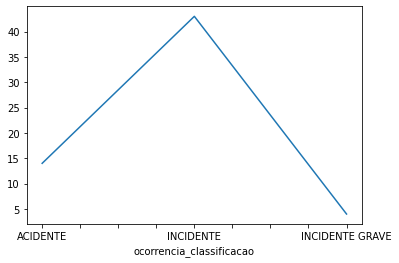

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size().plot()

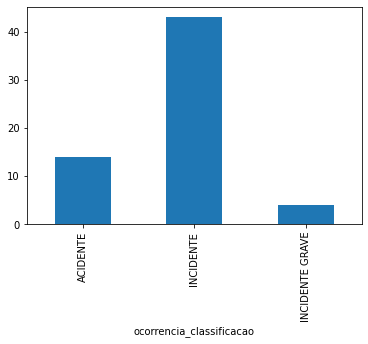

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size().plot.bar()

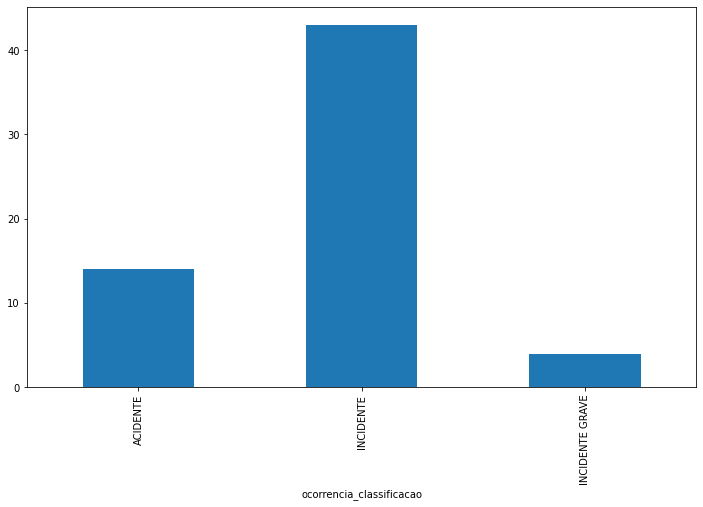

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size().plot.bar(figsize=(12,7))

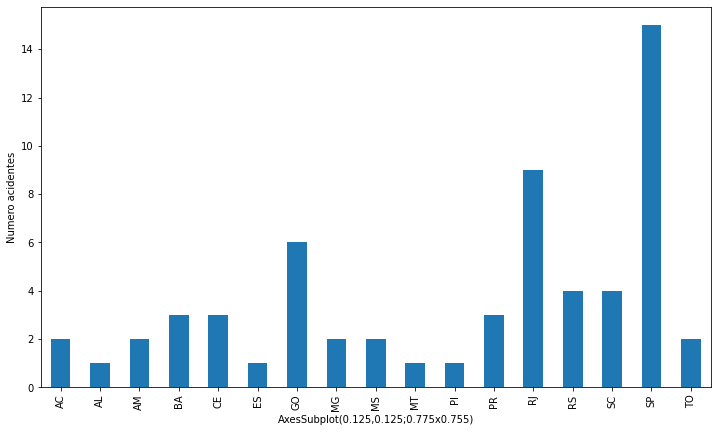

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size().plot.bar(figsize=(12,7), xlabel=df2012marco.groupby(['ocorrencia_classificacao']).size().plot.bar(figsize=(12,7),xlabel='Tipos acidente',ylabel='Numero acidentes'))

In [ ]:
df2012marco.groupby(['ocorrencia_classificacao']).size().sort_values(ascending=True)

ocorrencia_classificacao
INCIDENTE GRAVE     4
ACIDENTE           14
INCIDENTE          43
dtype: int64

In [ ]:
ano2011=df.ocorrencia_dia.dt.year==2011
estados=df.ocorrencia_uf.isin(['SP','RJ', 'MG','ES'])
dfsudeste2011=df.loc[ano2011 & estados]
dfsudeste2011

,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
552,43633,43633,INCIDENTE GRAVE,RIBEIRÃO PRETO,SP,SBRP,2011-01-01,19:35:00,10,2011-01-01 19:35:00
554,43643,43643,INCIDENTE,RIO DE JANEIRO,RJ,SBJR,2011-01-02,17:18:00,0,2011-01-02 17:18:00
558,43631,43631,INCIDENTE,CONFINS,MG,SBCF,2011-01-05,15:36:00,0,2011-01-05 15:36:00
559,43642,43642,INCIDENTE,BAURU,SP,SBBU,2011-01-05,22:06:00,0,2011-01-05 22:06:00
560,43630,43630,INCIDENTE,COLINA,SP,<NA>,2011-01-06,11:30:00,0,2011-01-06 11:30:00
...,...,...,...,...,...,...,...,...,...,...
1120,45327,45327,INCIDENTE,CONFINS,MG,SBCF,2011-12-29,06:48:00,0,2011-12-29 06:48:00
1122,51880,51880,INCIDENTE,GUARULHOS,SP,<NA>,2011-12-29,09:00:00,0,2011-12-29 09:00:00
1123,51881,51881,INCIDENTE,BELO HORIZONTE,MG,<NA>,2011-12-29,17:18:00,0,2011-12-29 17:18:00
1124,51882,51882,INCIDENTE,GUARULHOS,SP,SBGR,2011-12-29,14:11:00,0,2011-12-29 14:11:00


In [ ]:
dfsudeste2011.groupby(['ocorrencia_classificacao']).size()

ocorrencia_classificacao
ACIDENTE            65
INCIDENTE          176
INCIDENTE GRAVE     21
dtype: int64

In [ ]:
dfsudeste2011.groupby([ 'ocorrencia_classificacao','ocorrencia_uf']).size()

ocorrencia_classificacao  ocorrencia_uf
ACIDENTE                  ES                1
                          MG               12
                          RJ                9
                          SP               43
INCIDENTE                 ES                6
                          MG               23
                          RJ               63
                          SP               84
INCIDENTE GRAVE           ES                2
                          MG                7
                          RJ                5
                          SP                7
dtype: int64

In [ ]:
dfsudeste2011.groupby(['ocorrencia_uf', 'ocorrencia_classificacao']).size()

ocorrencia_uf  ocorrencia_classificacao
ES             ACIDENTE                     1
               INCIDENTE                    6
               INCIDENTE GRAVE              2
MG             ACIDENTE                    12
               INCIDENTE                   23
               INCIDENTE GRAVE              7
RJ             ACIDENTE                     9
               INCIDENTE                   63
               INCIDENTE GRAVE              5
SP             ACIDENTE                    43
               INCIDENTE                   84
               INCIDENTE GRAVE              7
dtype: int64

In [ ]:
dfsudeste2011.groupby(['ocorrencia_uf','ocorrencia_cidade']).size().sort_values(ascending=False)

ocorrencia_uf  ocorrencia_cidade
RJ             RIO DE JANEIRO       44
SP             GUARULHOS            20
               SÃO PAULO            20
MG             BELO HORIZONTE       14
SP             RIBEIRÃO PRETO       14
                                    ..
               CAIABU                1
               TIETÊ                 1
               ARARAS                1
               AMERICANA             1
ES             ARACRUZ               1
Length: 84, dtype: int64

In [ ]:
dfsudeste2011.groupby(['ocorrencia_aerodromo'],dropna=False).codigo_ocorrencia.sum()

ocorrencia_aerodromo
SBAU     147609
SBBH     187184
SBBP     230095
SBBU      88044
SBCB      51778
SBCF      88958
SBCP      44435
SBGL     274295
SBGR     660402
SBIP      51793
SBJD      44902
SBJR     459859
SBKP      43707
SBME     244840
SBML      43634
SBMT     231242
SBPR     185254
SBRJ     420578
SBRP     221232
SBSJ      51828
SBSP     178849
SBSR     141613
SBUL      89594
SBUR      44442
SBVT     133563
SDAA      43901
SDBB     103597
SDBV      45268
SDCO     103643
SDET      44645
SDIO      44377
SDJA     133153
SDMC      48814
SDOR      90127
SDPW     103659
SDTB      98506
SDTK      43832
SDVE      44734
SIBX      51785
SIRS      51789
SNPD      51781
NaN     6526509
Name: codigo_ocorrencia, dtype: int64

**CARREGAMENTO/LOAD**

In [ ]:
dfsudeste2011.to_csv('sudeste2011.csv', index=False)
df2012marco.to_csv('marco2021.csv', index=False)

In [ ]:
teste=pd.read_csv('/content/marco2021.csv')
teste


,codigo_ocorrencia,codigo_ocorrencia2,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,data_hora
0,45727,45727,INCIDENTE,BARRA DO GARÇAS,MT,SBBW,2012-03-01 00:00:00,12:50:00,0,2012-03-01 12:50:00
1,45526,45526,ACIDENTE,QUERÊNCIA DO NORTE,PR,NaN,2012-03-02 00:00:00,12:50:00,0,2012-03-02 12:50:00
2,45589,45589,ACIDENTE,LINS,SP,SWXQ,2012-03-02 00:00:00,17:35:00,0,2012-03-02 17:35:00
3,45707,45707,INCIDENTE,FORTALEZA,CE,SBFZ,2012-03-02 00:00:00,22:12:00,0,2012-03-02 22:12:00
4,45610,45610,INCIDENTE,SÃO JOSÉ DO RIO PRETO,SP,NaN,2012-03-03 00:00:00,13:00:00,0,2012-03-03 13:00:00
...,...,...,...,...,...,...,...,...,...,...
56,45773,45773,INCIDENTE,SANTA MARIA,RS,NaN,2012-03-29 00:00:00,20:33:00,0,2012-03-29 20:33:00
57,45785,45785,INCIDENTE,COARI,AM,NaN,2012-03-29 00:00:00,15:20:00,3,2012-03-29 15:20:00
58,45754,45754,INCIDENTE GRAVE,GOIÂNIA,GO,SWNV,2012-03-30 00:00:00,14:30:00,0,2012-03-30 14:30:00
59,45774,45774,INCIDENTE,BELO HORIZONTE,MG,SBBH,2012-03-30 00:00:00,13:31:00,0,2012-03-30 13:31:00


In [ ]:
df.to_csv('baseparadata.csv', index=False)